In [85]:
import numpy 
import math

# This is the specific example of the song "Delicate"
def cal_pop_fitness(Optimization_goal, population):
    # Calculating the fitness value of each solution in the current population.
    fitness = numpy.sum(-(population - Optimization_goal)**2, axis=1)
    return fitness


def mutation(offspring_X, num_mutations=1):
    for index in range(offspring_X.shape[0]):
        # Randomly choosing the indices for mutation
        mutation_indices = numpy.random.randint(low=0, high=offspring_X.shape[1], size=num_mutations)
        
        for gene_index in mutation_indices:
            # Check if the mutation index is 0 mod 4
            if gene_index % 5 == 0:
                # The random value can be from 0 to 24
                random_value = numpy.random.randint(0, 25, 1)
                # Mutate the gene using the new random value
                offspring_X[index, gene_index] = random_value
            else:
                # The random value to be added to the gene.
                random_value = numpy.random.randint(0, 13, 1)
                # Make sure the mutation results in a valid value if there are boundaries
                offspring_X[index, gene_index] = (offspring_X[index, gene_index] + random_value) % 12
    return offspring_X

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        most_fit_index = numpy.where(fitness == numpy.max(fitness))
        most_fit_index = most_fit_index[0][0]
        parents[parent_num, :] = pop[most_fit_index, :]
        fitness[most_fit_index] = -100000
    return parents



def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    X_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        parent1_index = k%parents.shape[0]
        parent2_index = (k+1)%parents.shape[0]
        offspring[k, 0:X_point] = parents[parent1_index, 0:X_point]
        offspring[k, X_point:] = parents[parent2_index, X_point:]
    return offspring




In [86]:
Optimization_goal = [13,1,2,6,4]

num_weights = 5

population_size = 20
mating_size = 5

pop_size = (population_size,num_weights)
new_population_gene1 = numpy.random.randint(low=0, high=24, size=(population_size, 1))
new_population_gene2 = numpy.random.randint(low=0, high=12, size=(population_size, 4))
new_population_combined = numpy.hstack((new_population_gene1, new_population_gene2))

print(new_population_combined[0:5])

[[ 2  0  8  0  1]
 [13  7  7  4  4]
 [11 11  1 11 11]
 [ 2  2  4  9  2]
 [ 3  5  6 11  5]]


In [87]:
new_population_combined_initial = new_population_combined.copy()

Generation :  0
Best result :  -28
Mutation
[[14.  4.  0.  1. 10.]
 [18.  9.  7.  4.  4.]
 [13.  7.  0.  8.  0.]
 [ 0.  6.  0.  2.  2.]
 [ 6.  2.  3.  2.  9.]
 [14.  9.  0.  1.  4.]
 [18.  0.  8.  4.  4.]
 [13.  7.  0.  8.  6.]
 [ 9. 11.  0.  2.  2.]
 [10.  2.  3.  2.  5.]
 [14.  4.  0.  1.  4.]
 [18.  0.  7.  4.  9.]
 [13.  7.  0.  8.  0.]
 [21.  6.  0.  2.  2.]
 [ 6.  2.  3.  2.  5.]]
Generation :  1
Best result :  -28
Mutation
[[14.  4.  3.  2.  5.]
 [10.  2.  3.  1.  4.]
 [14.  4.  0.  9.  6.]
 [13.  7.  0.  1.  4.]
 [18.  6.  3.  2.  5.]
 [14.  4.  3.  4.  5.]
 [10.  2.  0.  1.  5.]
 [14.  4.  0.  8. 11.]
 [13.  7.  0.  1.  4.]
 [18.  0.  3.  2.  4.]
 [ 9.  4.  3.  2.  5.]
 [10.  2.  8.  1.  4.]
 [14.  4.  0.  8.  6.]
 [13.  7.  0.  5.  4.]
 [18.  0.  0.  2.  5.]]
Generation :  2
Best result :  -16
Mutation
[[14.  4.  0.  8.  6.]
 [14.  4.  0.  9.  6.]
 [14.  4.  3.  8.  5.]
 [14.  4.  3.  2.  5.]
 [ 2.  2.  3.  4.  5.]
 [17.  4.  0.  8.  6.]
 [14.  4.  0.  9.  1.]
 [ 2.  4.  3.  

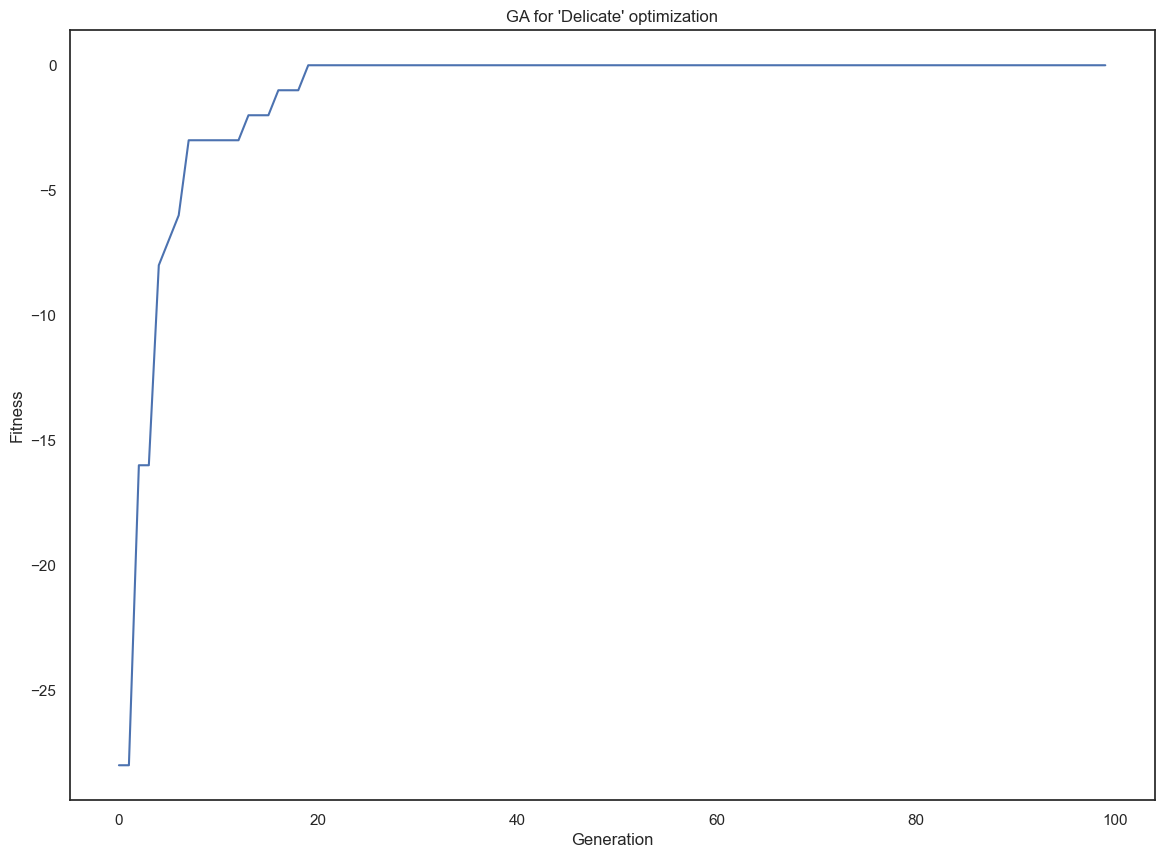

In [88]:
best_outputs = []
generations = 100
for generation in range(generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(Optimization_goal, new_population_combined)
    #print("Fitness")
    #print(fitness)

    best_outputs.append(numpy.max(fitness))
    
    print("Best result : ", numpy.max(fitness))
    
    parents = select_mating_pool(new_population_combined, fitness, 
                                      mating_size)
    #print("Parents")
    #print(parents)

    offspring_X = crossover(parents,
                                    offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    #print("Crossover")
    #print(offspring_X)

    offspring_mutation = mutation(offspring_X, num_mutations=1)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population_combined[0:parents.shape[0], :] = parents
    new_population_combined[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population_combined)
# Then return the index of that solution corresponding to the best fitness.
best_match_index = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population_combined[best_match_index, :])
print("Best best_max_index: ", best_match_index)
print("Best solution fitness : ", fitness[best_match_index])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.title("GA for 'Delicate' optimization")
matplotlib.pyplot.xlabel("Generation")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
import umap.umap_ as umap
import sklearn.cluster as cluster
import time
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline
import hdbscan

In [39]:
df = pd.DataFrame(new_population_combined, columns = ["key", "1", "2","3","4"])
df

,key,1,2,3,4
0,13,1,2,6,4
1,13,1,2,6,4
2,13,1,2,6,4
3,13,1,2,6,4
4,13,1,2,6,4
5,13,1,5,6,4
6,13,1,2,4,4
7,13,1,10,6,4
8,13,1,2,1,4
9,13,1,2,6,6


In [29]:
clusterable_embedding = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    #densmap=True
).fit_transform(new_population_combined)

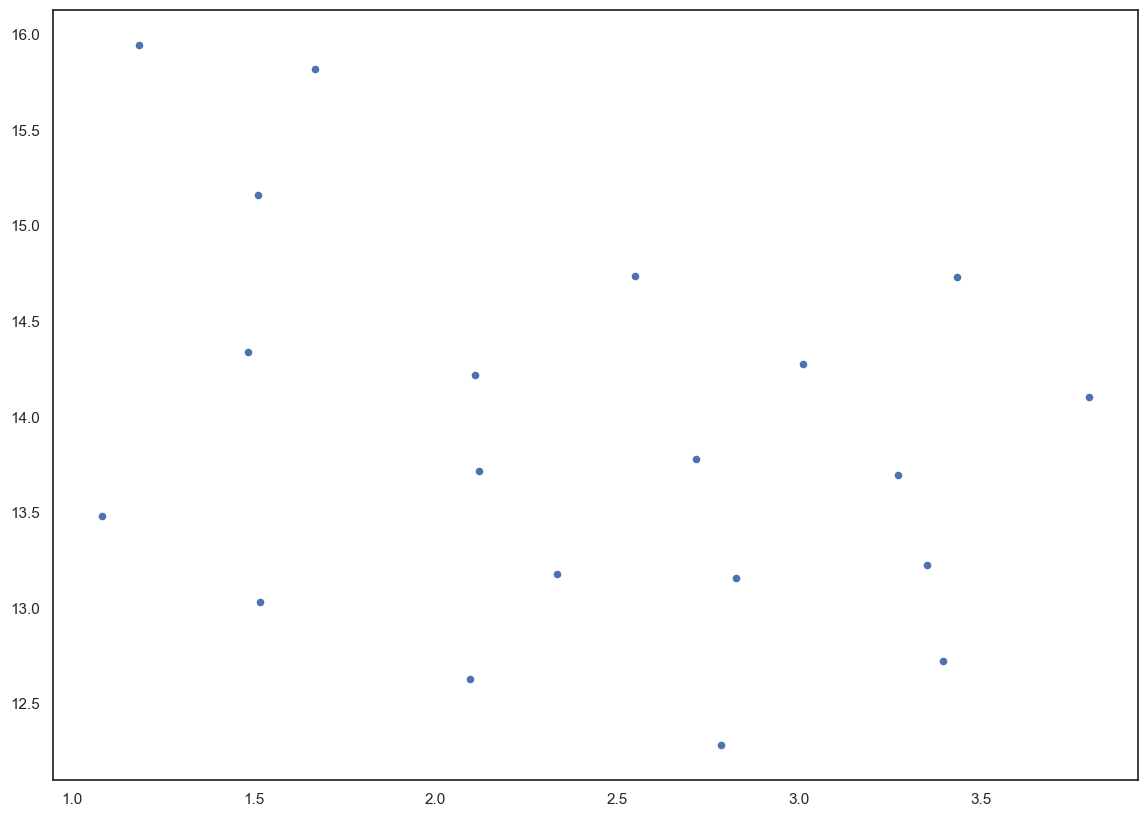

In [30]:
plt.scatter(clusterable_embedding[:,0], clusterable_embedding[:,1], s= 20)


In [40]:
df2 = pd.DataFrame(new_population_combined_initial, columns = ["key", "1", "2","3","4"])
df2

,key,1,2,3,4
0,14,10,2,2,9
1,19,2,6,4,0
2,20,8,8,6,5
3,10,5,0,11,9
4,12,4,3,1,8
5,17,9,7,8,5
6,13,11,0,5,9
7,0,4,6,0,7
8,0,8,11,5,5
9,2,8,4,5,3


In [32]:
clusterable_embedding_initial = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    #densmap=True
).fit_transform(new_population_combined_initial)

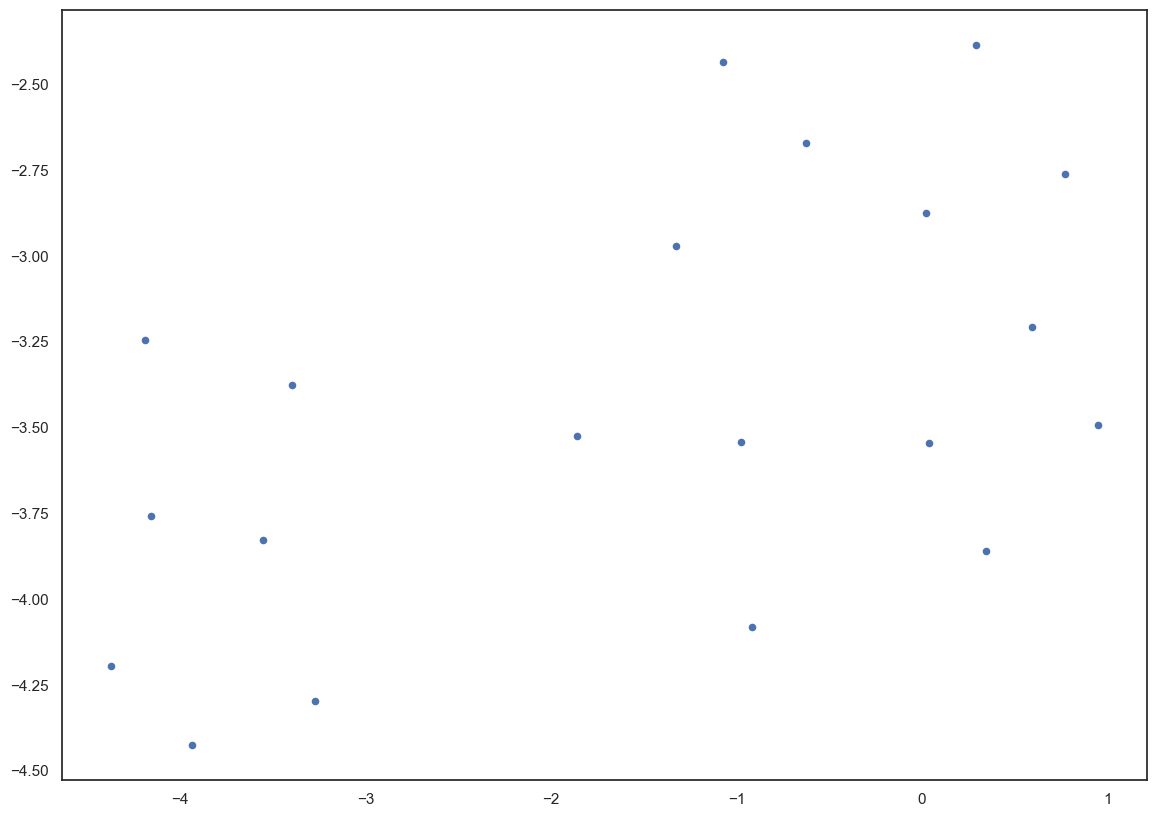

In [33]:
plt.scatter(clusterable_embedding_initial[:,0], clusterable_embedding_initial[:,1], s= 20)


In [42]:
Combined_pop = pd.concat([df,df2], ignore_index=True)


In [49]:
hdbscan_labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=5,
).fit_predict(Combined_pop)

In [46]:
clusterable_embedding_combined = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42,
    #densmap=True
).fit_transform(Combined_pop)

In [54]:
kmeans_labels = cluster.KMeans(n_clusters=2).fit_predict(Combined_pop)

/Users/alexwang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


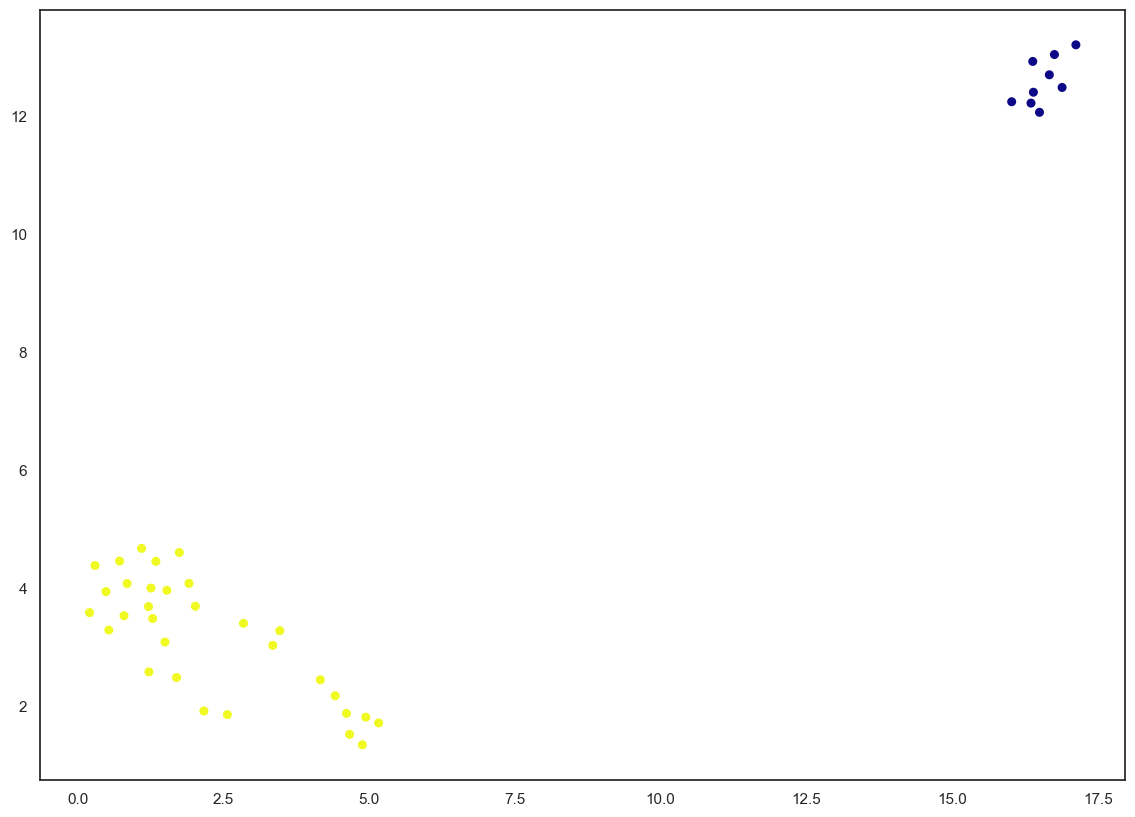

In [63]:
plt.scatter(clusterable_embedding_combined[:,0], clusterable_embedding_combined[:,1], s= 30, c=kmeans_labels, cmap = "plasma")
